In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
data=pd.read_csv('/content/drive/MyDrive/project datasets/Auto Sales data.csv')
data

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,24/02/2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,07/05/2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,01/07/2018,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,25/08/2018,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,28/10/2018,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,10350,20,112.22,15,2244.40,02/12/2019,2924,Shipped,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Small
2743,10373,29,137.19,1,3978.51,31/01/2020,2865,Shipped,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,Oulu,90110,Finland,Koskitalo,Pirkko,Medium
2744,10386,43,125.99,4,5417.57,01/03/2020,2836,Resolved,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Medium
2745,10397,34,62.24,1,2116.16,28/03/2020,2810,Shipped,Ships,54,S72_3212,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,Toulouse,31000,France,Roulet,Annette,Small


#

In [4]:
data.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'DAYS_SINCE_LASTORDER', 'STATUS', 'PRODUCTLINE',
       'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'CITY',
       'POSTALCODE', 'COUNTRY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [5]:
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,24/02/2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,07/05/2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,01/07/2018,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,25/08/2018,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,28/10/2018,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2747 non-null   int64  
 1   QUANTITYORDERED       2747 non-null   int64  
 2   PRICEEACH             2747 non-null   float64
 3   ORDERLINENUMBER       2747 non-null   int64  
 4   SALES                 2747 non-null   float64
 5   ORDERDATE             2747 non-null   object 
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64  
 7   STATUS                2747 non-null   object 
 8   PRODUCTLINE           2747 non-null   object 
 9   MSRP                  2747 non-null   int64  
 10  PRODUCTCODE           2747 non-null   object 
 11  CUSTOMERNAME          2747 non-null   object 
 12  PHONE                 2747 non-null   object 
 13  ADDRESSLINE1          2747 non-null   object 
 14  CITY                  2747 non-null   object 
 15  POSTALCODE           

In [7]:
data.dtypes.value_counts()

,count
object,13
int64,5
float64,2


In [8]:
data.index
data.shape
data.columns
data.size

54940

In [9]:
data.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,DAYS_SINCE_LASTORDER,MSRP
count,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000
mean,10259.761558,35.103021,101.098952,6.491081,3553.047583,1757.085912,100.691664
std,91.877521,9.762135,42.042549,4.230544,1838.953901,819.280576,40.114802
min,10100.000000,6.000000,26.880000,1.000000,482.130000,42.000000,33.000000
25%,10181.000000,27.000000,68.745000,3.000000,2204.350000,1077.000000,68.000000
50%,10264.000000,35.000000,95.550000,6.000000,3184.800000,1761.000000,99.000000
75%,10334.500000,43.000000,127.100000,9.000000,4503.095000,2436.500000,124.000000
max,10425.000000,97.000000,252.870000,18.000000,14082.800000,3562.000000,214.000000


In [10]:
data.count()

,0
ORDERNUMBER,2747
QUANTITYORDERED,2747
PRICEEACH,2747
ORDERLINENUMBER,2747
SALES,2747
ORDERDATE,2747
DAYS_SINCE_LASTORDER,2747
STATUS,2747
PRODUCTLINE,2747
MSRP,2747


In [11]:
data.values

array([[10107, 30, 95.7, ..., 'Yu', 'Kwai', 'Small'],
       [10121, 34, 81.35, ..., 'Henriot', 'Paul', 'Small'],
       [10134, 41, 94.74, ..., 'Da Cunha', 'Daniel', 'Medium'],
       ...,
       [10386, 43, 125.99, ..., 'Freyre', 'Diego', 'Medium'],
       [10397, 34, 62.24, ..., 'Roulet', 'Annette', 'Small'],
       [10414, 47, 65.52, ..., 'Yoshido', 'Juri', 'Medium']], dtype=object)

In [12]:
data.isna()
data.isna().sum()

,0
ORDERNUMBER,0
QUANTITYORDERED,0
PRICEEACH,0
ORDERLINENUMBER,0
SALES,0
ORDERDATE,0
DAYS_SINCE_LASTORDER,0
STATUS,0
PRODUCTLINE,0
MSRP,0


In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [14]:
data.ORDERDATE=le.fit_transform(data.ORDERDATE)
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,202,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,67,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,5,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,207,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,229,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [15]:
for i in data.columns:
  data[i]=le.fit_transform(data[i])

In [16]:
data.dtypes

,0
ORDERNUMBER,int64
QUANTITYORDERED,int64
PRICEEACH,int64
ORDERLINENUMBER,int64
SALES,int64
ORDERDATE,int64
DAYS_SINCE_LASTORDER,int64
STATUS,int64
PRODUCTLINE,int64
MSRP,int64


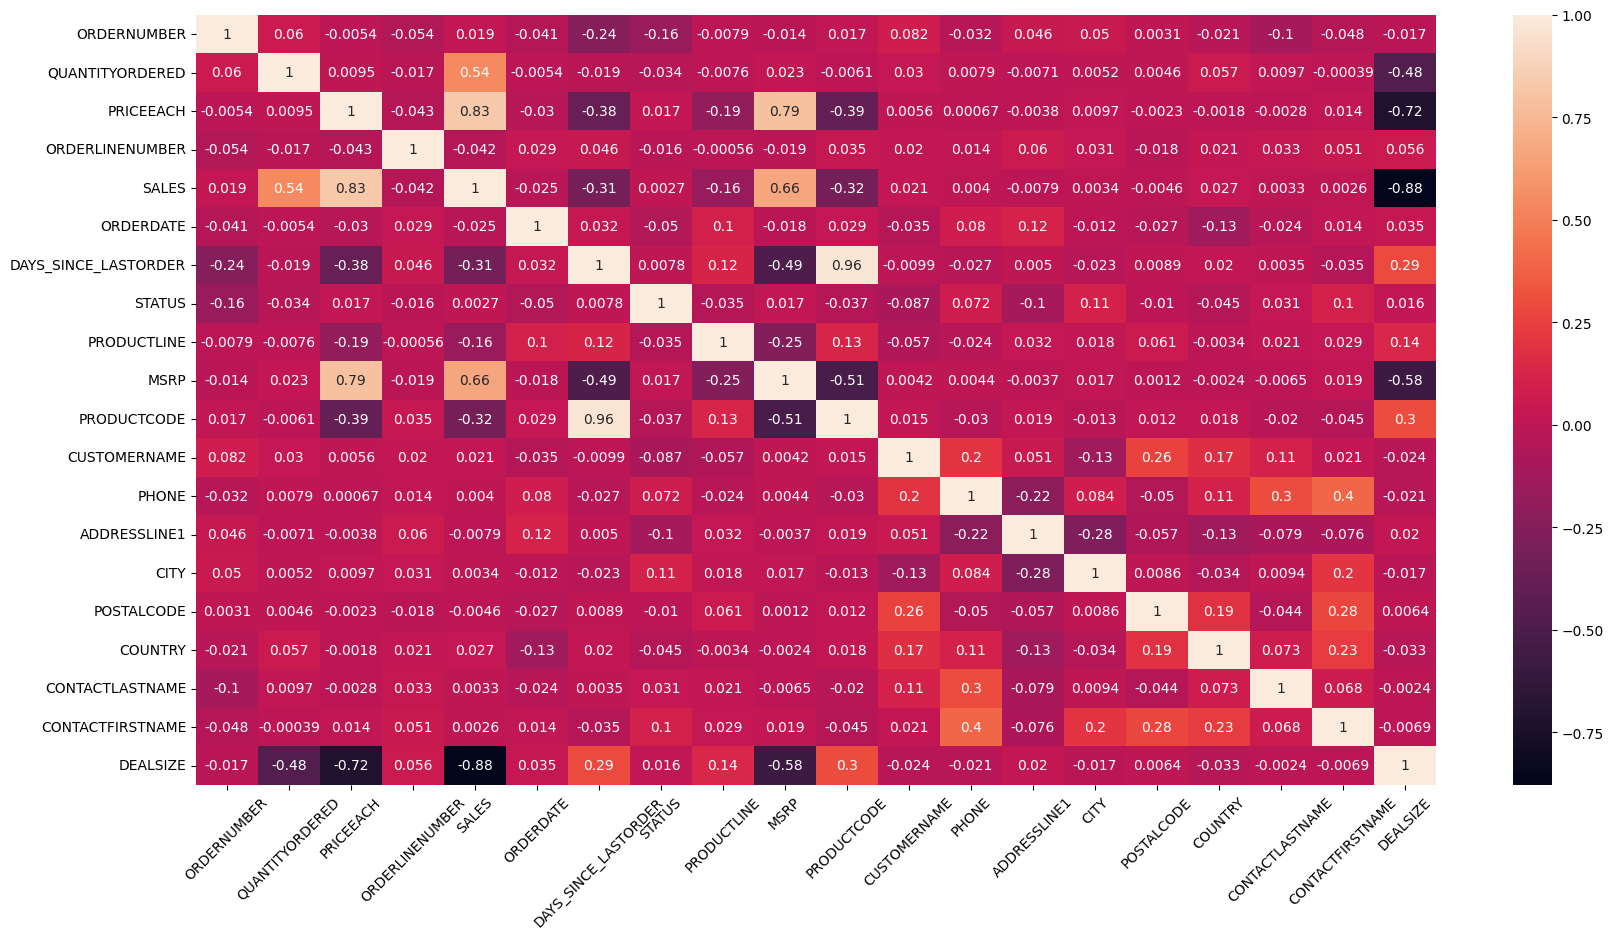

In [17]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)
plt.xticks(rotation=45);

In [18]:
cor=data.corr()
cor['DEALSIZE'].sort_values(ascending=False)

,DEALSIZE
DEALSIZE,1.000000
PRODUCTCODE,0.299348
DAYS_SINCE_LASTORDER,0.292659
PRODUCTLINE,0.135022
ORDERLINENUMBER,0.056093
ORDERDATE,0.034948
ADDRESSLINE1,0.020359
STATUS,0.016248
POSTALCODE,0.006423
CONTACTLASTNAME,-0.002406


In [19]:
columns_to_drop = ["ORDERNUMBER","CONTACTFIRSTNAME","PHONE","CUSTOMERNAME","MSRP","PRICEEACH"]
data.drop (columns_to_drop, axis=1, inplace=True)
data.head()

,QUANTITYORDERED,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,PRODUCTCODE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,DEALSIZE
0,19,1,1143,202,328,5,1,0,54,41,0,18,75,2
1,23,4,1060,67,286,5,1,0,39,55,27,6,27,2
2,30,1,1758,5,251,5,1,0,21,51,41,6,16,1
3,34,5,1681,207,219,5,1,0,51,52,49,18,74,1
4,25,0,1531,229,180,5,1,0,55,12,54,18,29,1


Text(0.5, 1.0, 'countplot')

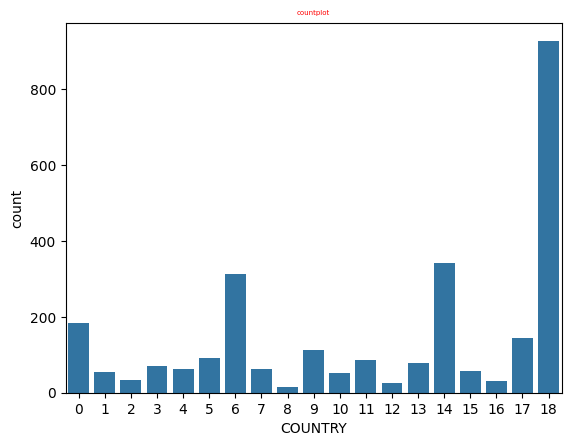

In [20]:
sns.countplot(x='COUNTRY',data=data)
plt.title("countplot",color='RED',fontsize=5)

<Axes: xlabel='ORDERDATE', ylabel='PRODUCTLINE'>

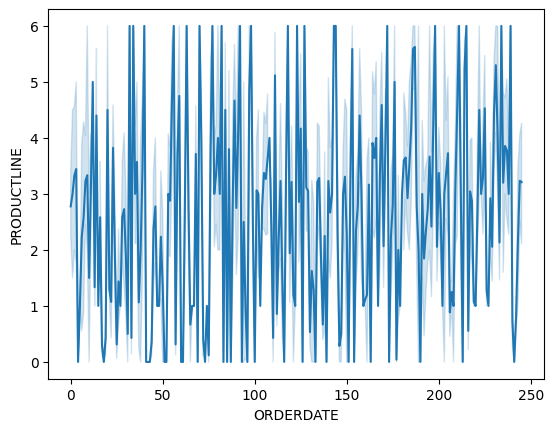

In [21]:
sns.lineplot(x='ORDERDATE',y="PRODUCTLINE",data=data)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

<Axes: >

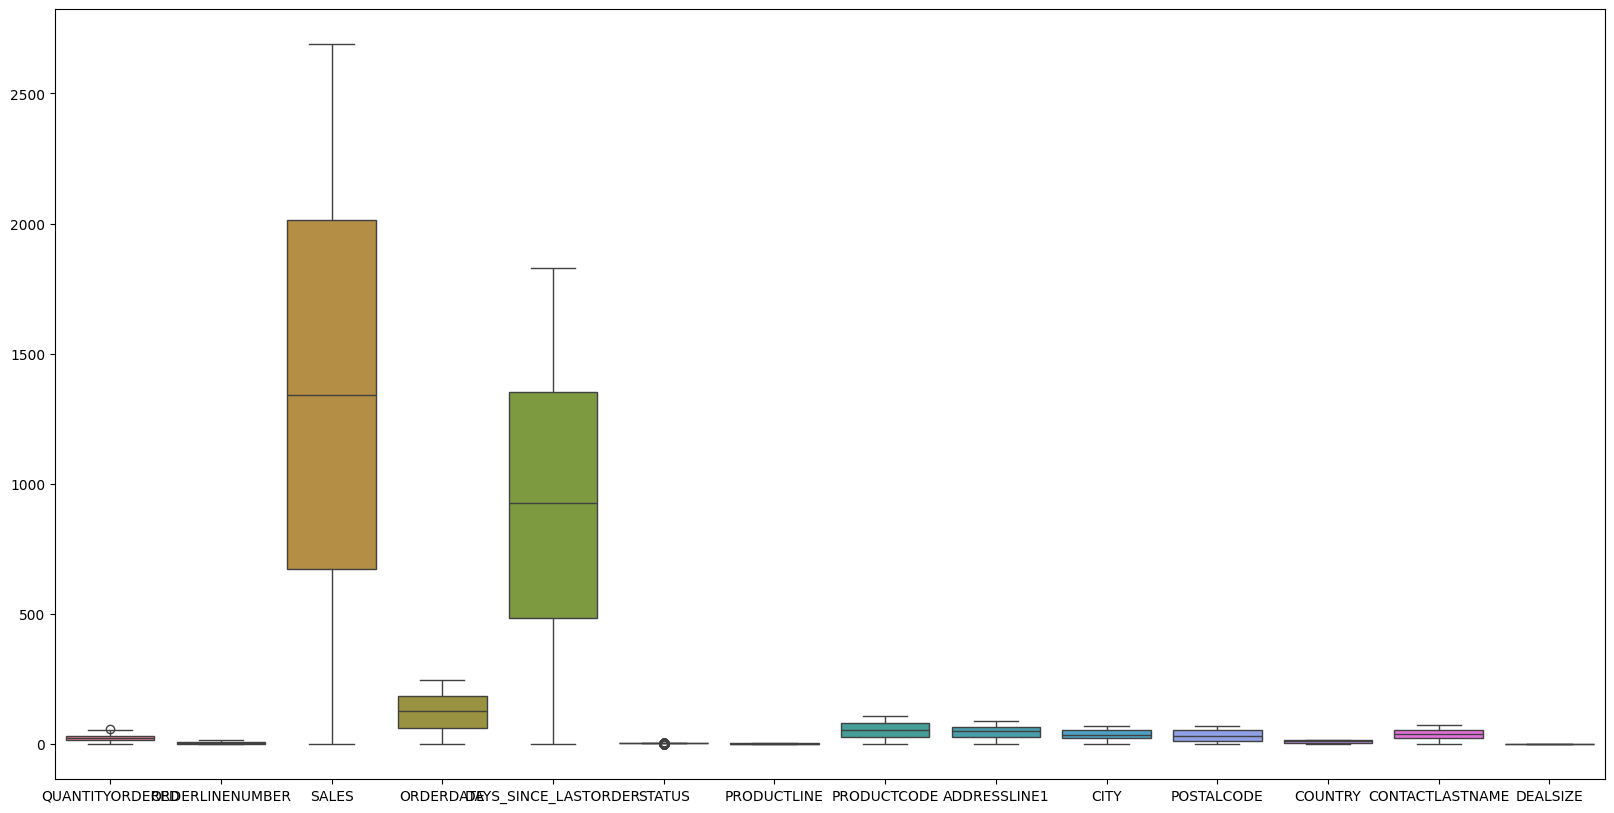

In [22]:
plt.figure(figsize=(20,10))
sns.boxplot(data)

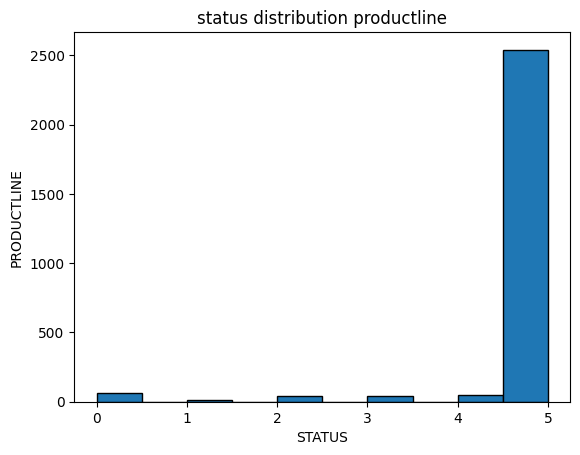

In [23]:
plt.hist(data['STATUS'],bins=10,edgecolor='black')
plt.xlabel('STATUS')
plt.ylabel('PRODUCTLINE')
plt.title('status distribution productline')
plt.show()

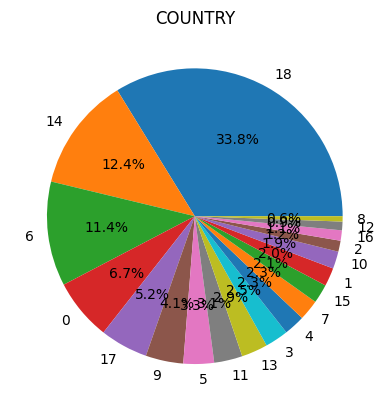

In [24]:
country_count=data['COUNTRY'].value_counts()
plt.pie(country_count,labels=country_count.index,autopct='%1.1f%%')
plt.title('COUNTRY')
plt.show()

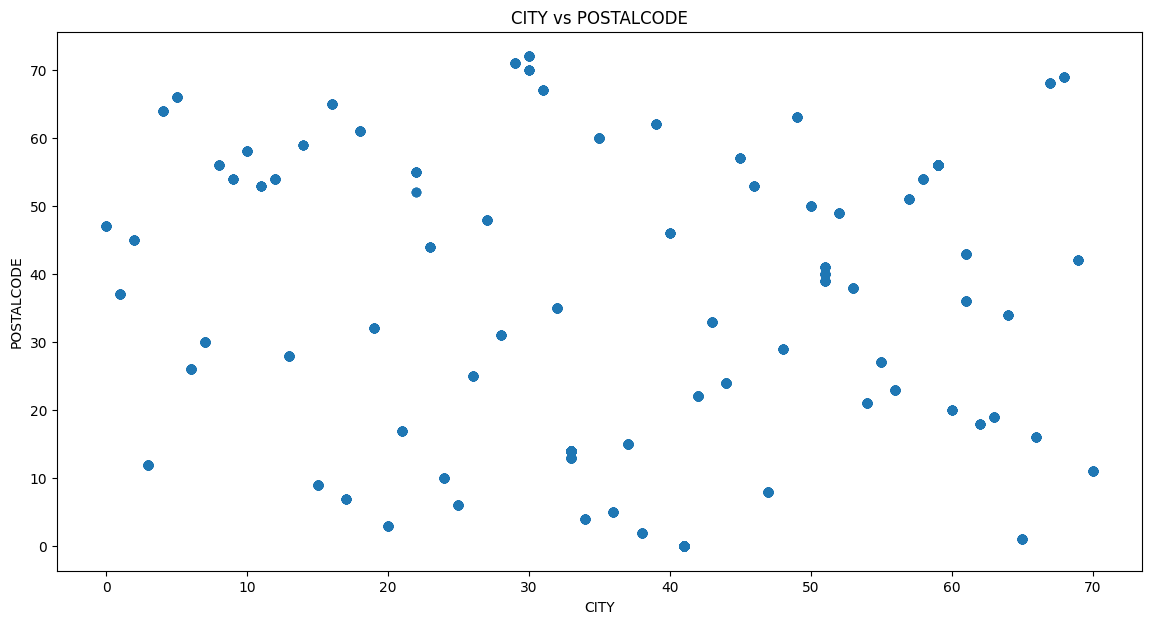

In [25]:
plt.figure(figsize=(14, 7))
plt.scatter(data['CITY'],data['POSTALCODE'])
plt.title('CITY vs POSTALCODE')
plt.xlabel('CITY')
plt.ylabel('POSTALCODE')
plt.show()

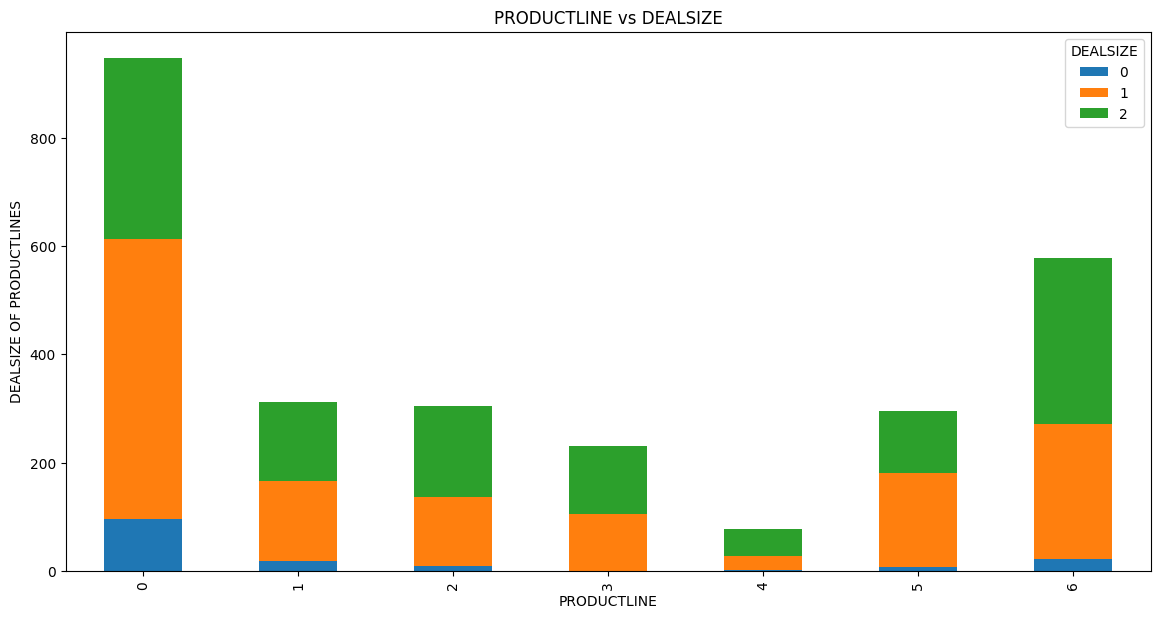

In [26]:
target=data.groupby(['PRODUCTLINE','DEALSIZE']).size().unstack().fillna(0)
target.plot(kind='bar',stacked=True, figsize=(14,7))
plt.title('PRODUCTLINE vs DEALSIZE')
plt.xlabel('PRODUCTLINE')
plt.ylabel('DEALSIZE OF PRODUCTLINES')
plt.show()

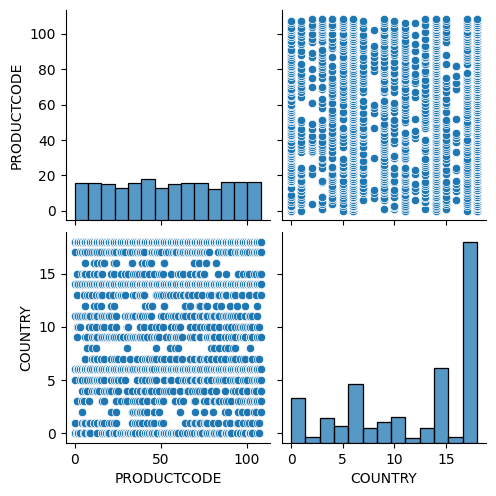

In [27]:
sns.pairplot(data[['PRODUCTCODE', 'COUNTRY']])
plt.show()

In [29]:
!pip install -U notebook-as-pdf
!pyppeteer-install

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.2/144.2 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.9 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.2.3
    Uninstalling urllib3-2.2.3:
      Successfully uninstalled urllib3-2.2.3
[INFO] Starting Chromium download.
100% 183M/183M [00:06<00:00, 27.1Mb/s]
[INFO] Beginning extraction
[INFO] Chromium extracted to: /root/.local/share/pyppeteer/local-chromium/1181205
